In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,delay_rate,arr_cancelled,...,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,0.288889,4.0,...,8.63,3.24,4.41,0.0,9.72,561.0,223.0,282.0,0.0,818.0
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.200000,0.0,...,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,124.0
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,0.333333,2.0,...,7.21,1.82,8.65,0.0,5.32,981.0,54.0,294.0,0.0,369.0
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,0.277419,9.0,...,12.78,2.69,10.34,0.0,17.19,827.0,198.0,517.0,0.0,1335.0
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,0.337209,4.0,...,9.32,0.00,4.07,0.0,15.61,638.0,0.0,194.0,0.0,1102.0


In [5]:
import os
print(os.listdir())
os.chdir('/Users/user/Documents/projects/Airline Delays')
print(os.getcwd())

['python carrier_delay_gradient.py', 'Untitled1.ipynb', '.DS_Store', 'Untitled.ipynb', '.ipynb_checkpoints']
/Users/user/Documents/projects/Airline Delays


In [16]:
carrier_agg = df.groupby(['carrier','carrier_name']).agg({
'delay_rate':'mean',
'arr_flights':'mean',
'carrier_delay': 'sum',
'weather_delay': 'sum',
'nas_delay': 'sum',
'security_delay': 'sum',
'late_aircraft_delay': 'sum'
}).reset_index()

In [21]:
top_5 = carrier_agg.sort_values('delay_rate', ascending=False).head(5)
top_5.head()

,carrier,carrier_name,delay_rate,arr_flights,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
3,B6,JetBlue Airways,0.282639,333.803376,6871383.0,463006.0,3407339.0,28867.0,6750058.0
1,AA,American Airlines Network,0.271319,651.125527,20319919.0,3081089.0,8160536.0,104766.0,27625223.0
7,F9,Frontier Airlines,0.259034,192.965070,3861746.0,320581.0,2383460.0,0.0,6694241.0
10,HA,Hawaiian Airlines Network,0.253371,307.802018,1284712.0,76357.0,87885.0,10017.0,906705.0
12,NK,Spirit Airlines,0.231368,346.499552,3646476.0,450019.0,5384230.0,86356.0,3738332.0


In [29]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
top_5['total_delays'] = top_5[delay_cols].sum(axis=1)
for col in delay_cols:
    top_5[col + '_pct'] = top_5[col]/top_5['total_delays'] * 100
pct_cols = [col + '_pct' for col in delay_cols]

In [30]:
top_5.head()

,carrier,carrier_name,delay_rate,arr_flights,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,col_pct,carrier_delay_pct,weather_delay_pct,nas_delay_pct,security_delay_pct,late_aircraft_delay_pct,total_delays
3,B6,JetBlue Airways,0.282639,333.803376,6871383.0,463006.0,3407339.0,28867.0,6750058.0,17520653.0,38.526292,39.218761,2.642630,19.447557,0.164760,38.526292,17520653.0
1,AA,American Airlines Network,0.271319,651.125527,20319919.0,3081089.0,8160536.0,104766.0,27625223.0,59291533.0,46.592189,34.271199,5.196508,13.763409,0.176696,46.592189,59291533.0
7,F9,Frontier Airlines,0.259034,192.965070,3861746.0,320581.0,2383460.0,0.0,6694241.0,13260028.0,50.484365,29.123212,2.417649,17.974774,0.000000,50.484365,13260028.0
10,HA,Hawaiian Airlines Network,0.253371,307.802018,1284712.0,76357.0,87885.0,10017.0,906705.0,2365676.0,38.327522,54.306338,3.227703,3.715006,0.423431,38.327522,2365676.0
12,NK,Spirit Airlines,0.231368,346.499552,3646476.0,450019.0,5384230.0,86356.0,3738332.0,13305413.0,28.096324,27.405959,3.382225,40.466463,0.649029,28.096324,13305413.0


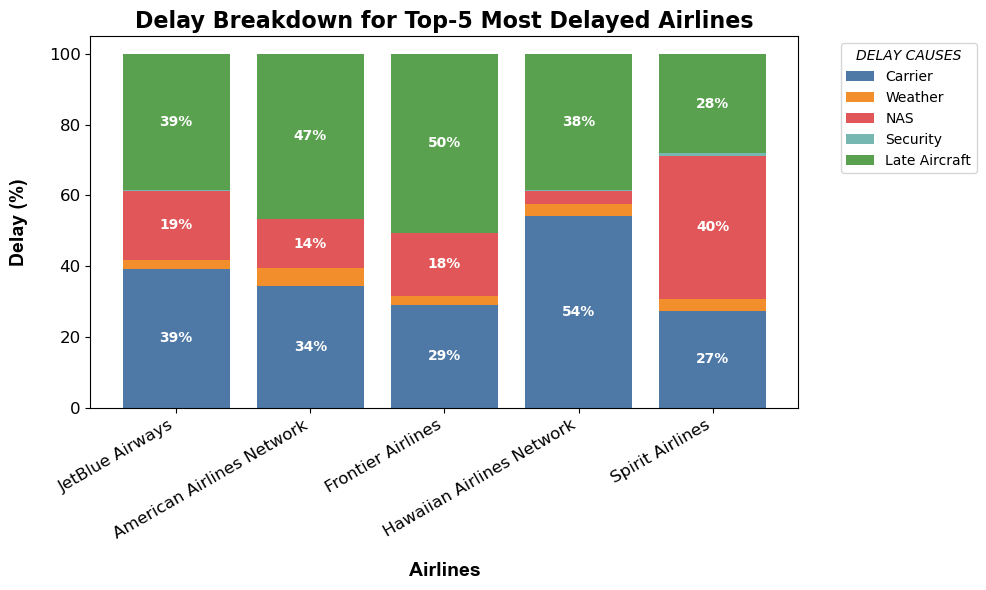

In [130]:
plt.figure(figsize= (10,6))
ax = plt.gca()
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
bottom = [0] * len(top_5)
for i, col in enumerate(pct_cols):
    bars = plt.bar(
        top_5['carrier_name'], 
        top_5[col],
        bottom=bottom,
        color=colors[i],
        label=labels[i]
    )

    
    for j, bar in enumerate(bars):
        height = top_5.iloc[j][col]
        if height > 8:  
            plt.text(
                bar.get_x() + bar.get_width()/2,
                bottom[j] + height/2,
                f"{height:.0f}%",
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

    for j in range(len(bottom)):
        bottom[j] += top_5.iloc[j][col]

    plt.title('Delay Breakdown for Top-5 Most Delayed Airlines', fontsize=16, fontweight='bold')
plt.ylabel('Delay (%)', fontname='Arial', fontsize=14, fontweight='bold', labelpad=15)
plt.xlabel('Airlines', fontname='Arial', fontsize=14, fontweight='bold', labelpad=15)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(title='DELAY CAUSES', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_title().set_fontstyle('italic')
plt.tight_layout()
plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/Delay_Causes_Top_5.png')
plt.show()
